In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import comb
from itertools import chain

# Ex. 4.15

In [5]:
def log(x):
    if (x == 0):
        return 1
    else:
        return (math.log(x, 2))

In [6]:
def combinatorial(p, N, r):
    if (N > 10 and N < N - 10):
        
        return int(2**(N * (p * log(p) + (1 - p) * log(1 - p))))
    
    else: 
        
        return int(comb(N, r))

In [7]:
def prob_x(p, N, r):
    return (p**r) * ((1 - p)**(N - r))

In [8]:
def prob_r(p, N, r):
    values = []
    if (r == 0 or r == N):
        
        return [prob_x(p, N, r)]  
    
    else:
        values.append(prob_x(p, N, r))
        
        return np.array(values * combinatorial(p, N, r)).tolist()

Bits for N = 1, N = 2, N = 3, and N = 10

In [22]:
def delta_bits(N, p):
    probs_N = [prob_r(p, N, r) for r in range (0, N + 1)]
    probs_N = list(chain(*probs_N))
    bits = []
    delta = []
    pr_sort = sorted(probs_N)

    delta.append(0)
    bits.append(log(len(pr_sort))/N)

    while (len(pr_sort) > 2):
        delta.append(pr_sort[0])    
        pr_sort[1] = pr_sort[0] + pr_sort[1]
        pr_sort.remove(pr_sort[0])
        bits.append(log(len(pr_sort))/N)

    for y in np.arange(pr_sort[0], 1, 0.01):
                delta.append(y)
                bits.append(0)
                
    return delta, bits

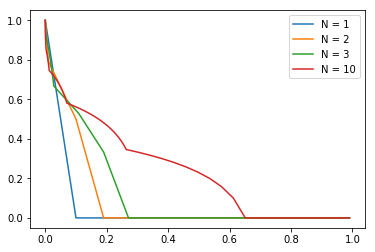

In [27]:
p = 0.1
N_sequences = [1, 2, 3, 10]

for N in N_sequences:
    delta = delta_bits(N, p)[0]
    bits = delta_bits(N, p)[1]
    plt.plot(delta, bits)
    plt.legend(["N = 1", "N = 2", "N = 3", "N = 10"])